**Load dataset**

In [4]:
import pandas as pd

# Load datasets
df = pd.read_csv('/content/all combined together.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       550 non-null    int64  
 1   Site             550 non-null    int64  
 2   Gender           549 non-null    float64
 3   Age              550 non-null    float64
 4   Handedness       549 non-null    object 
 5   DX               550 non-null    object 
 6   Secondary Dx     114 non-null    object 
 7   ADHD Measure     461 non-null    object 
 8   ADHD Index       382 non-null    object 
 9   Inattentive      461 non-null    object 
 10  Hyper/Impulsive  461 non-null    object 
 11  IQ Measure       524 non-null    float64
 12  Verbal IQ        471 non-null    float64
 13  Performance IQ   471 non-null    float64
 14  Full2 IQ         140 non-null    float64
 15  Full4 IQ         550 non-null    int64  
 16  Med Status       461 non-null    object 
 17  QC_Rest_1       

In [6]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   ScanDir ID  Site  Gender    Age Handedness       DX Secondary Dx   \
0       26001     2     1.0  16.92          1  pending       pending   
1       26002     2     1.0  15.68          1  pending       pending   
2       26004     2     0.0  14.99          1  pending       pending   
3       26005     2     0.0  15.16          1  pending       pending   
4       26009     2     1.0  16.91          0  pending       pending   

  ADHD Measure ADHD Index Inattentive  ... Performance IQ  Full2 IQ  Full4 IQ  \
0      pending    pending     pending  ...          104.0       NaN       120   
1      pending    pending     pending  ...          106.0       NaN       107   
2      pending    pending     pending  ...          123.0       NaN       125   
3      pending    pending     pending  ...          131.0       NaN       126   
4      pending    pending     pending  ...           81.0       NaN        97   

   Med Status  QC_Rest_1  QC_Rest_2 QC_Rest_3  

In [7]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
         ScanDir ID        Site      Gender         Age  IQ Measure  \
count  5.500000e+02  550.000000  549.000000  550.000000  524.000000   
mean   1.860445e+06    4.652727    0.581056   11.609418    0.028626   
std    2.254556e+06    1.785731    0.493836    3.125917   43.729102   
min    1.000100e+04    1.000000    0.000000    7.170000 -999.000000   
25%    1.600925e+04    3.000000    0.000000    9.000000    2.000000   
50%    1.489242e+06    5.000000    1.000000   11.000000    2.000000   
75%    2.989435e+06    6.000000    1.000000   13.627500    2.000000   
max    9.922944e+06    7.000000    1.000000   20.450000    3.000000   

        Verbal IQ  Performance IQ    Full2 IQ    Full4 IQ   QC_Rest_1  \
count  471.000000      471.000000  140.000000  550.000000  544.000000   
mean   -11.352442      -15.414013 -626.078571   89.990909    0.852941   
std    348.560650      347.114851  526.490813  148.925275    0.354491   
min   -999.000000     -99

**Cleaning of data**

In [8]:
# Convert age values from float to integer (rounding first)
df['Age'] = df['Age'].round().astype(int)
print(df['Age'].head())

0    17
1    16
2    15
3    15
4    17
Name: Age, dtype: int64


In [9]:
# Replace "N/A" with blank values
df.replace("N/A", "", inplace=True)

# Verify the replacement
print(df.tail())


     ScanDir ID  Site  Gender  Age Handedness DX Secondary Dx  ADHD Measure  \
545       16015     7     1.0   12          1  0           NaN          NaN   
546       16035     7     1.0   14          1  0           NaN          NaN   
547       16023     7     0.0   13          0  0           NaN          NaN   
548       16054     7     1.0   16          1  0           NaN          NaN   
549       16002     7     0.0   10          1  0           NaN          NaN   

    ADHD Index Inattentive  ... Performance IQ  Full2 IQ  Full4 IQ  \
545        NaN         NaN  ...         -999.0    -999.0       108   
546        NaN         NaN  ...         -999.0    -999.0       113   
547        NaN         NaN  ...          105.0     110.0       107   
548        NaN         NaN  ...         -999.0    -999.0       105   
549        NaN         NaN  ...         -999.0    -999.0       120   

     Med Status  QC_Rest_1  QC_Rest_2 QC_Rest_3  QC_Rest_4  QC_Anatomical_1  \
545         NaN        0.

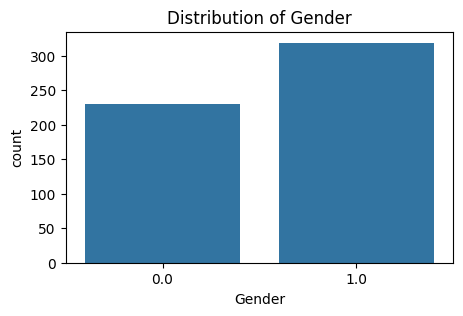

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Gender distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

In [11]:
# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
ScanDir ID           0
Site                 0
Gender               1
Age                  0
Handedness           1
DX                   0
Secondary Dx       436
ADHD Measure        89
ADHD Index         168
Inattentive         89
Hyper/Impulsive     89
IQ Measure          26
Verbal IQ           79
Performance IQ      79
Full2 IQ           410
Full4 IQ             0
Med Status          89
QC_Rest_1            6
QC_Rest_2          284
QC_Rest_3          471
QC_Rest_4          549
QC_Anatomical_1      1
QC_Anatomical_2    414
dtype: int64


In [12]:
# Calculate the correlation coefficient between IQ2 and IQ4
correlation = df['Full2 IQ'].corr(df['Full4 IQ'])

# Print the correlation coefficient
print("Correlation coefficient between IQ2 and IQ4:", correlation)

Correlation coefficient between IQ2 and IQ4: -0.05300595126247439


Since the correlation is close to zero we can say they are not related and hence we drop IQ2 due to excess missing and noisy data

In [13]:
# Drop the "Full2 IQ" column from the DataFrame
df.drop(columns=['Full2 IQ'], inplace=True)

# Verify that the column has been dropped
print(df.head())

   ScanDir ID  Site  Gender  Age Handedness       DX Secondary Dx   \
0       26001     2     1.0   17          1  pending       pending   
1       26002     2     1.0   16          1  pending       pending   
2       26004     2     0.0   15          1  pending       pending   
3       26005     2     0.0   15          1  pending       pending   
4       26009     2     1.0   17          0  pending       pending   

  ADHD Measure ADHD Index Inattentive  ... Verbal IQ  Performance IQ  \
0      pending    pending     pending  ...     133.0           104.0   
1      pending    pending     pending  ...     106.0           106.0   
2      pending    pending     pending  ...     119.0           123.0   
3      pending    pending     pending  ...     116.0           131.0   
4      pending    pending     pending  ...     113.0            81.0   

   Full4 IQ  Med Status  QC_Rest_1 QC_Rest_2  QC_Rest_3  QC_Rest_4  \
0       120     pending        1.0       NaN        NaN        NaN   
1     

In [14]:


# Count occurrences of -999 in the "Verbal IQ" column
verbal_iq_count = (df['Verbal IQ'] == -999).sum()

# Count occurrences of -999 in the "Performance IQ" column
performance_iq_count = (df['Performance IQ'] == -999).sum()

# Count occurrences of -999 in the "Full4 IQ" column
full4_iq_count = (df['Full4 IQ'] == -999).sum()

# Print the counts
print("Occurrences of -999 in Verbal IQ:", verbal_iq_count)
print("Occurrences of -999 in Performance IQ:", performance_iq_count)
print("Occurrences of -999 in Full4 IQ:", full4_iq_count)


Occurrences of -999 in Verbal IQ: 52
Occurrences of -999 in Performance IQ: 52
Occurrences of -999 in Full4 IQ: 10


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       550 non-null    int64  
 1   Site             550 non-null    int64  
 2   Gender           549 non-null    float64
 3   Age              550 non-null    int64  
 4   Handedness       549 non-null    object 
 5   DX               550 non-null    object 
 6   Secondary Dx     114 non-null    object 
 7   ADHD Measure     461 non-null    object 
 8   ADHD Index       382 non-null    object 
 9   Inattentive      461 non-null    object 
 10  Hyper/Impulsive  461 non-null    object 
 11  IQ Measure       524 non-null    float64
 12  Verbal IQ        471 non-null    float64
 13  Performance IQ   471 non-null    float64
 14  Full4 IQ         550 non-null    int64  
 15  Med Status       461 non-null    object 
 16  QC_Rest_1        544 non-null    float64
 17  QC_Rest_2       

In [16]:
# Print rows 100 to 130
print(df.iloc[100:110])

     ScanDir ID  Site  Gender  Age Handedness DX  Secondary Dx  ADHD Measure  \
100     3170319     3     0.0   10          1  1            ODD            2   
101     1988015     3     1.0   11          1  0  Simple Phobia            2   
102     1735881     3     0.0    9          2  0            NaN            2   
103     2081148     3     0.0    9          1  1            NaN            2   
104     2360428     3     1.0    9          1  0            NaN            2   
105     2903997     3     0.0   12          1  0            NaN            2   
106     2703289     3     1.0   11          1  0            NaN            2   
107     1577042     3     1.0    9          1  1            NaN            2   
108     2621228     3     0.0    9          1  0            NaN            2   
109     1000804     5     1.0    7       0.83  0            NaN            2   

    ADHD Index Inattentive  ... Verbal IQ  Performance IQ  Full4 IQ  \
100         67          73  ...     112.0       

In [17]:
import numpy as np

# Replace -999 with NaN in the 'Full4 IQ' column
df['Full4 IQ'].replace(-999, np.nan, inplace=True)

# Impute missing values with the mean of the column
mean_full4_iq = df['Full4 IQ'].mean()
df['Full4 IQ'].fillna(mean_full4_iq, inplace=True)
print (df['Full4 IQ'].min())

73.0


<ipython-input-17-42844dcc067c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Full4 IQ'].replace(-999, np.nan, inplace=True)


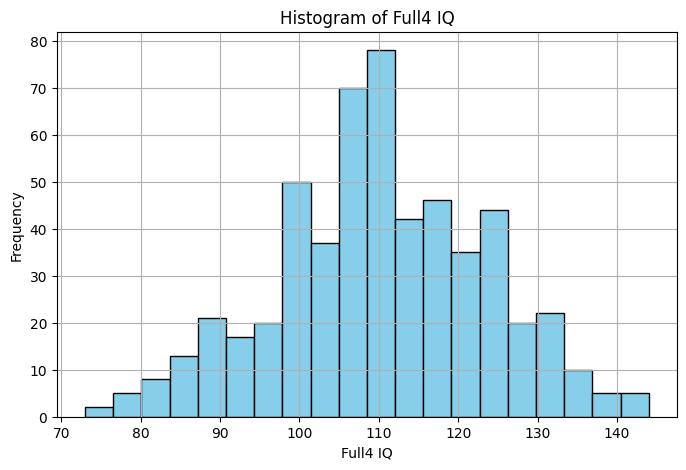

In [18]:
import matplotlib.pyplot as plt

# Filter out NaN values from the 'Full4 IQ' column
full4_iq_values = df['Full4 IQ'].dropna()

# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(full4_iq_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Full4 IQ')
plt.ylabel('Frequency')
plt.title('Histogram of Full4 IQ')
plt.grid(True)
plt.show()


In [19]:
# Calculate the mode (most frequently occurring value) of the 'Gender' column
mode_gender = df['Gender'].mode()[0]

# Replace missing values in the 'Gender' column with the mode
df['Gender'].fillna(mode_gender, inplace=True)

<ipython-input-19-a58dff68248d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_gender, inplace=True)


In [20]:
# Calculate the mode (most frequently occurring value) of the 'Handedness' column
mode_handedness = df['Handedness'].mode()[0]

# Replace missing values in the 'Handedness' column with the mode
df['Handedness'].fillna(mode_handedness, inplace=True)


<ipython-input-20-0c229f196f91>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Handedness'].fillna(mode_handedness, inplace=True)


In [21]:
# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                   0
Secondary Dx       436
ADHD Measure        89
ADHD Index         168
Inattentive         89
Hyper/Impulsive     89
IQ Measure          26
Verbal IQ           79
Performance IQ      79
Full4 IQ             0
Med Status          89
QC_Rest_1            6
QC_Rest_2          284
QC_Rest_3          471
QC_Rest_4          549
QC_Anatomical_1      1
QC_Anatomical_2    414
dtype: int64


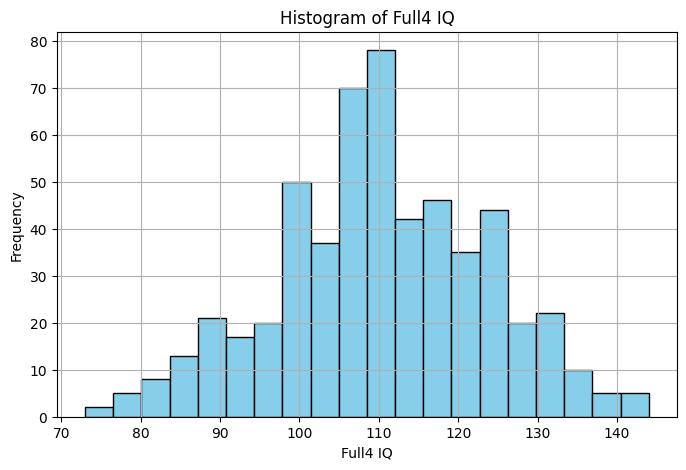

In [22]:
import matplotlib.pyplot as plt

# Filter out NaN values from the 'Full4 IQ' column
full4_iq_values = df['Full4 IQ'].dropna()

# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(full4_iq_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Full4 IQ')
plt.ylabel('Frequency')
plt.title('Histogram of Full4 IQ')
plt.grid(True)
plt.show()


NOT TO RMOVE


In [23]:
import pandas as pd

# Assuming your DataFrame is named 'df'

columns_to_remove = ['QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2']

df_cleaned = df.drop(columns=columns_to_remove)
df = df_cleaned

In [24]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                   0
Secondary Dx       436
ADHD Measure        89
ADHD Index         168
Inattentive         89
Hyper/Impulsive     89
IQ Measure          26
Verbal IQ           79
Performance IQ      79
Full4 IQ             0
Med Status          89
dtype: int64


In [25]:
import pandas as pd

# Assuming df is your DataFrame
# Print all the features (columns)
print(df.columns)


Index(['ScanDir ID', 'Site', 'Gender', 'Age', 'Handedness', 'DX',
       'Secondary Dx ', 'ADHD Measure', 'ADHD Index', 'Inattentive',
       'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ', 'Performance IQ',
       'Full4 IQ', 'Med Status'],
      dtype='object')


In [26]:
import pandas as pd

# Assuming df is your DataFrame
# Drop the 'Secondary_Dx' column
df.drop(columns=['Secondary Dx '], inplace=True)


In [27]:
# Replace 'pending' with NaN in the whole DataFrame
df.replace('pending', pd.NA, inplace=True)

# Print the DataFrame to verify the changes
print(df)


     ScanDir ID  Site  Gender  Age Handedness    DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  <NA>         <NA>       <NA>   
1         26002     2     1.0   16          1  <NA>         <NA>       <NA>   
2         26004     2     0.0   15          1  <NA>         <NA>       <NA>   
3         26005     2     0.0   15          1  <NA>         <NA>       <NA>   
4         26009     2     1.0   17          0  <NA>         <NA>       <NA>   
..          ...   ...     ...  ...        ...   ...          ...        ...   
545       16015     7     1.0   12          1     0          NaN        NaN   
546       16035     7     1.0   14          1     0          NaN        NaN   
547       16023     7     0.0   13          0     0          NaN        NaN   
548       16054     7     1.0   16          1     0          NaN        NaN   
549       16002     7     0.0   10          1     0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal

In [28]:
# Count the number of null values in each column
null_values = df.isnull().sum()

# Print the number of null values in each column
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                  26
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          26
Verbal IQ           79
Performance IQ      79
Full4 IQ             0
Med Status         115
dtype: int64


In [29]:
# Sort the DataFrame by the 'Age' column
sorted_df = df.sort_values(by='Age')

# Print the sorted DataFrame
print(sorted_df)


     ScanDir ID  Site  Gender  Age Handedness DX ADHD Measure ADHD Index  \
316       10072     5     1.0    7       0.45  1            2         58   
130     1875084     5     0.0    7       0.71  0            2         45   
382     3244985     6     1.0    7          1  0            3        NaN   
357     2288903     6     1.0    7          1  1            3        NaN   
171     3619797     5     1.0    7       0.16  1            2         74   
..          ...   ...     ...  ...        ... ..          ...        ...   
470       16086     7     1.0   19          1  0          NaN        NaN   
514       16077     7     0.0   19          1  0          NaN        NaN   
523       16085     7     0.0   19          1  0          NaN        NaN   
466       16089     7     0.0   20          1  0          NaN        NaN   
472       16088     7     0.0   20          1  0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  \
316          

In [30]:
summary = df.describe()
print(summary)

         ScanDir ID        Site      Gender         Age  IQ Measure  \
count  5.500000e+02  550.000000  550.000000  550.000000  524.000000   
mean   1.860445e+06    4.652727    0.581818   11.605455    0.028626   
std    2.254556e+06    1.785731    0.493709    3.147087   43.729102   
min    1.000100e+04    1.000000    0.000000    7.000000 -999.000000   
25%    1.600925e+04    3.000000    0.000000    9.000000    2.000000   
50%    1.489242e+06    5.000000    1.000000   11.000000    2.000000   
75%    2.989435e+06    6.000000    1.000000   14.000000    2.000000   
max    9.922944e+06    7.000000    1.000000   20.000000    3.000000   

        Verbal IQ  Performance IQ    Full4 IQ  
count  471.000000      471.000000  550.000000  
mean   -11.352442      -15.414013  110.157407  
std    348.560650      347.114851   13.326748  
min   -999.000000     -999.000000   73.000000  
25%     98.000000       92.500000  102.000000  
50%    109.000000      105.000000  109.000000  
75%    119.000000      1

In [31]:

import numpy as np

# Replace -999 with NaN using masking
df = df.mask(df == -999, np.nan)

# Print the DataFrame to verify the changes
print(df)


     ScanDir ID  Site  Gender  Age Handedness    DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  <NA>         <NA>       <NA>   
1         26002     2     1.0   16          1  <NA>         <NA>       <NA>   
2         26004     2     0.0   15          1  <NA>         <NA>       <NA>   
3         26005     2     0.0   15          1  <NA>         <NA>       <NA>   
4         26009     2     1.0   17          0  <NA>         <NA>       <NA>   
..          ...   ...     ...  ...        ...   ...          ...        ...   
545       16015     7     1.0   12          1     0          NaN        NaN   
546       16035     7     1.0   14          1     0          NaN        NaN   
547       16023     7     0.0   13          0     0          NaN        NaN   
548       16054     7     1.0   16          1     0          NaN        NaN   
549       16002     7     0.0   10          1     0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal

In [32]:
# Convert <NA> to NaN in the DataFrame
df.replace(pd.NA, np.nan, inplace=True)

# Print the DataFrame to verify the changes
print(df)


     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Perform

In [33]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                  26
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          27
Verbal IQ          131
Performance IQ     131
Full4 IQ             0
Med Status         115
dtype: int64


In [34]:
# Sort the DataFrame by the 'Age' column
sorted_df = df.sort_values(by='Age')

# Print the sorted DataFrame
print(sorted_df)

     ScanDir ID  Site  Gender  Age Handedness DX ADHD Measure ADHD Index  \
316       10072     5     1.0    7       0.45  1            2         58   
130     1875084     5     0.0    7       0.71  0            2         45   
382     3244985     6     1.0    7          1  0            3        NaN   
357     2288903     6     1.0    7          1  1            3        NaN   
171     3619797     5     1.0    7       0.16  1            2         74   
..          ...   ...     ...  ...        ... ..          ...        ...   
470       16086     7     1.0   19          1  0          NaN        NaN   
514       16077     7     0.0   19          1  0          NaN        NaN   
523       16085     7     0.0   19          1  0          NaN        NaN   
466       16089     7     0.0   20          1  0          NaN        NaN   
472       16088     7     0.0   20          1  0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  \
316          

In [35]:
import pandas as pd

# Define the bins for age
bins = [7, 10, 13, 16, 20]  # Define age ranges for bins

# Define labels for the age groups
labels = ['7-10', '11-13', '14-16', '17-20']  # Define labels for age ranges

# Use pd.cut() to bin the Age values and create age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average values for each column within each age group
average_values = df.groupby('Age Group')[['ADHD Measure', 'ADHD Index', 'Inattentive',
                                          'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ',
                                          'Performance IQ']].mean()

# Round up the average values to the nearest integer
average_values = average_values.round(0).astype(int)

# Print the average values for each column within each age group
print("Average values for individuals in each age group (rounded up to nearest integer):")
print(average_values)


<ipython-input-35-1972b3299b6e>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_values = df.groupby('Age Group')[['ADHD Measure', 'ADHD Index', 'Inattentive',


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Fill missing values in the "IQ Measure" column with 2
df['IQ Measure'].fillna(2, inplace=True)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'IQ Measure' with 2:")
print(df)


In [36]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                  26
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          27
Verbal IQ          131
Performance IQ     131
Full4 IQ             0
Med Status         115
Age Group            2
dtype: int64


In [37]:
# Replace empty spaces in Verbal IQ for individuals aged 7 to 13 with 112
df.loc[(df['Age'] >= 7) & (df['Age'] <= 13), 'Verbal IQ'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 13), 'Verbal IQ'].fillna(112)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)


DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:
     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          Na

In [38]:
summary = df.describe()
print (summary)

         ScanDir ID        Site      Gender         Age  IQ Measure  \
count  5.500000e+02  550.000000  550.000000  550.000000  523.000000   
mean   1.860445e+06    4.652727    0.581818   11.605455    1.938815   
std    2.254556e+06    1.785731    0.493709    3.147087    0.502945   
min    1.000100e+04    1.000000    0.000000    7.000000    1.000000   
25%    1.600925e+04    3.000000    0.000000    9.000000    2.000000   
50%    1.489242e+06    5.000000    1.000000   11.000000    2.000000   
75%    2.989435e+06    6.000000    1.000000   14.000000    2.000000   
max    9.922944e+06    7.000000    1.000000   20.000000    3.000000   

        Verbal IQ  Performance IQ    Full4 IQ  
count  516.000000      419.000000  550.000000  
mean   111.366279      106.653938  110.157407  
std     12.785138       13.782384   13.326748  
min     65.000000       71.000000   73.000000  
25%    105.000000       98.000000  102.000000  
50%    112.000000      106.000000  109.000000  
75%    118.000000      1

In [39]:

df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Verbal IQ'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Verbal IQ'].fillna(109)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)

DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:
     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          Na

In [40]:

df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Verbal IQ'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Verbal IQ'].fillna(111)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)

DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:
     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          Na

In [41]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                  26
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          27
Verbal IQ            0
Performance IQ     131
Full4 IQ             0
Med Status         115
Age Group            2
dtype: int64


In [42]:

df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Performance IQ'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Performance IQ'].fillna(107)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)

DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:
     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          Na

In [43]:
df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Performance IQ'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Performance IQ'].fillna(105)
df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Performance IQ'] = df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Performance IQ'].fillna(108)
df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Performance IQ'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Performance IQ'].fillna(106)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)

DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:
     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          Na

In [44]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                  26
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          27
Verbal IQ            0
Performance IQ       0
Full4 IQ             0
Med Status         115
Age Group            2
dtype: int64


In [45]:
print(df['DX'].describe())

count     524
unique      4
top         0
freq      318
Name: DX, dtype: object


In [46]:
df['DX'] = df['DX'].replace('pending', np.nan)

# print(df)

In [47]:
import pandas as pd

# Filter the DataFrame for individuals aged 7 to 10
age_filtered_df = df[(df['Age'] >= 7) & (df['Age'] <= 10)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df['DX'] = pd.to_numeric(age_filtered_df['DX'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx = age_filtered_df['DX'].mean()

# Round up the average value to the nearest integer
rounded_average_dx = int(round(average_dx))

# Print the rounded average value of DX
print("Average DX for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx)


Average DX for individuals aged 7 to 10 (rounded up to nearest integer): 1


<ipython-input-47-786ecf85ad70>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df['DX'] = pd.to_numeric(age_filtered_df['DX'], errors='coerce')


In [48]:
df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'DX'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'DX'].fillna(1)
print (df)

     ScanDir ID  Site  Gender  Age Handedness   DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  NaN          NaN        NaN   
1         26002     2     1.0   16          1  NaN          NaN        NaN   
2         26004     2     0.0   15          1  NaN          NaN        NaN   
3         26005     2     0.0   15          1  NaN          NaN        NaN   
4         26009     2     1.0   17          0  NaN          NaN        NaN   
..          ...   ...     ...  ...        ...  ...          ...        ...   
545       16015     7     1.0   12          1    0          NaN        NaN   
546       16035     7     1.0   14          1    0          NaN        NaN   
547       16023     7     0.0   13          0    0          NaN        NaN   
548       16054     7     1.0   16          1    0          NaN        NaN   
549       16002     7     0.0   10          1    0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Perform

In [49]:
age_filtered_df1 = df[(df['Age'] >= 11) & (df['Age'] <= 13)]
age_filtered_df2 = df[(df['Age'] >= 14) & (df['Age'] <= 16)]
age_filtered_df3 = df[(df['Age'] >= 17) & (df['Age'] <= 20)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df1['DX'] = pd.to_numeric(age_filtered_df1['DX'], errors='coerce')
age_filtered_df2['DX'] = pd.to_numeric(age_filtered_df2['DX'], errors='coerce')
age_filtered_df3['DX'] = pd.to_numeric(age_filtered_df3['DX'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx1 = age_filtered_df1['DX'].mean()
average_dx2 = age_filtered_df2['DX'].mean()
average_dx3 = age_filtered_df3['DX'].mean()

# Round up the average value to the nearest integer
rounded_average_dx1 = int(round(average_dx1))
rounded_average_dx2 = int(round(average_dx2))
rounded_average_dx3 = int(round(average_dx3))

# Print the rounded average value of DX
print("Average DX for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx1)
print("Average DX for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx2)
print("Average DX for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx3)

Average DX for individuals aged 7 to 10 (rounded up to nearest integer): 1
Average DX for individuals aged 7 to 10 (rounded up to nearest integer): 0
Average DX for individuals aged 7 to 10 (rounded up to nearest integer): 0


<ipython-input-49-73dd08fc1ef6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df1['DX'] = pd.to_numeric(age_filtered_df1['DX'], errors='coerce')
<ipython-input-49-73dd08fc1ef6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df2['DX'] = pd.to_numeric(age_filtered_df2['DX'], errors='coerce')
<ipython-input-49-73dd08fc1ef6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [50]:
df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'DX'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'DX'].fillna(1)
df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'DX'] = df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'DX'].fillna(0)
df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'DX'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'DX'].fillna(0)
df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'DX'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'DX'].fillna(0)

# Print the DataFrame after filling missing values
# print("DataFrame after filling missing values in 'Verbal IQ' with 112 for age 7 to 13:")
print(df)

     ScanDir ID  Site  Gender  Age Handedness DX ADHD Measure ADHD Index  \
0         26001     2     1.0   17          1  0          NaN        NaN   
1         26002     2     1.0   16          1  0          NaN        NaN   
2         26004     2     0.0   15          1  0          NaN        NaN   
3         26005     2     0.0   15          1  0          NaN        NaN   
4         26009     2     1.0   17          0  0          NaN        NaN   
..          ...   ...     ...  ...        ... ..          ...        ...   
545       16015     7     1.0   12          1  0          NaN        NaN   
546       16035     7     1.0   14          1  0          NaN        NaN   
547       16023     7     0.0   13          0  0          NaN        NaN   
548       16054     7     1.0   16          1  0          NaN        NaN   
549       16002     7     0.0   10          1  0          NaN        NaN   

    Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  \
0           N

In [51]:
print(df['DX'].describe())

count     550
unique      6
top         0
freq      318
Name: DX, dtype: object


In [52]:
# Get the unique values of the "DX" column
unique_dx_values = df['DX'].unique()

# Print the unique values
print("Unique values of the 'DX' column:")
for value in unique_dx_values:
    print(value)


Unique values of the 'DX' column:
0
1
0
1
3
2


In [53]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                   0
ADHD Measure       115
ADHD Index         194
Inattentive        115
Hyper/Impulsive    115
IQ Measure          27
Verbal IQ            0
Performance IQ       0
Full4 IQ             0
Med Status         115
Age Group            2
dtype: int64


In [54]:
age_filtered_df1 = df[(df['Age'] >= 7) & (df['Age'] <= 10)]
age_filtered_df2 = df[(df['Age'] >= 11) & (df['Age'] <= 13)]
age_filtered_df3 = df[(df['Age'] >= 14) & (df['Age'] <= 16)]
age_filtered_df4 = df[(df['Age'] >= 17) & (df['Age'] <= 20)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df1['ADHD Measure'] = pd.to_numeric(age_filtered_df1['ADHD Measure'], errors='coerce')
age_filtered_df2['ADHD Measure'] = pd.to_numeric(age_filtered_df2['ADHD Measure'], errors='coerce')
age_filtered_df3['ADHD Measure'] = pd.to_numeric(age_filtered_df3['ADHD Measure'], errors='coerce')
age_filtered_df4['ADHD Measure'] = pd.to_numeric(age_filtered_df4['ADHD Measure'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx1 = age_filtered_df1['ADHD Measure'].mean()
average_dx2 = age_filtered_df2['ADHD Measure'].mean()
average_dx3 = age_filtered_df3['ADHD Measure'].mean()
average_dx4 = age_filtered_df4['ADHD Measure'].mean()

# Round up the average value to the nearest integer
rounded_average_dx1 = int(round(average_dx1))
rounded_average_dx2 = int(round(average_dx2))
rounded_average_dx3 = int(round(average_dx3))
rounded_average_dx4 = int(round(average_dx4))

# Print the rounded average value of DX
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx1)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx2)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx3)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx4)

Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 2
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 2
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 2
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 2


<ipython-input-54-fd3a9601f6ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df1['ADHD Measure'] = pd.to_numeric(age_filtered_df1['ADHD Measure'], errors='coerce')
<ipython-input-54-fd3a9601f6ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df2['ADHD Measure'] = pd.to_numeric(age_filtered_df2['ADHD Measure'], errors='coerce')
<ipython-input-54-fd3a9601f6ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [55]:
# Replace missing values in the "ADHD Measure" column with 2
df['ADHD Measure'].fillna(2, inplace=True)


<ipython-input-55-9d05c916a738>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADHD Measure'].fillna(2, inplace=True)


In [56]:
age_filtered_df1 = df[(df['Age'] >= 7) & (df['Age'] <= 10)]
age_filtered_df2 = df[(df['Age'] >= 11) & (df['Age'] <= 13)]
age_filtered_df3 = df[(df['Age'] >= 14) & (df['Age'] <= 16)]
age_filtered_df4 = df[(df['Age'] >= 17) & (df['Age'] <= 20)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df1['ADHD Index'] = pd.to_numeric(age_filtered_df1['ADHD Index'], errors='coerce')
age_filtered_df2['ADHD Index'] = pd.to_numeric(age_filtered_df2['ADHD Index'], errors='coerce')
age_filtered_df3['ADHD Index'] = pd.to_numeric(age_filtered_df3['ADHD Index'], errors='coerce')
age_filtered_df4['ADHD Index'] = pd.to_numeric(age_filtered_df4['ADHD Index'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx1 = age_filtered_df1['ADHD Index'].mean()
average_dx2 = age_filtered_df2['ADHD Index'].mean()
average_dx3 = age_filtered_df3['ADHD Index'].mean()
average_dx4 = age_filtered_df4['ADHD Index'].mean()

# Round up the average value to the nearest integer
rounded_average_dx1 = int(round(average_dx1))
rounded_average_dx2 = int(round(average_dx2))
rounded_average_dx3 = int(round(average_dx3))
rounded_average_dx4 = int(round(average_dx4))

# Print the rounded average value of DX
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx1)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx2)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx3)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx4)

Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 37
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 23
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 30
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 52


<ipython-input-56-b5fe764391e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df1['ADHD Index'] = pd.to_numeric(age_filtered_df1['ADHD Index'], errors='coerce')
<ipython-input-56-b5fe764391e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df2['ADHD Index'] = pd.to_numeric(age_filtered_df2['ADHD Index'], errors='coerce')
<ipython-input-56-b5fe764391e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [57]:
df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'ADHD Index'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'ADHD Index'].fillna(37)
df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'ADHD Index'] = df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'ADHD Index'].fillna(23)
df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'ADHD Index'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'ADHD Index'].fillna(30)
df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'ADHD Index'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'ADHD Index'].fillna(52)

In [58]:
age_filtered_df1 = df[(df['Age'] >= 7) & (df['Age'] <= 10)]
age_filtered_df2 = df[(df['Age'] >= 11) & (df['Age'] <= 13)]
age_filtered_df3 = df[(df['Age'] >= 14) & (df['Age'] <= 16)]
age_filtered_df4 = df[(df['Age'] >= 17) & (df['Age'] <= 20)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df1['Inattentive'] = pd.to_numeric(age_filtered_df1['Inattentive'], errors='coerce')
age_filtered_df2['Inattentive'] = pd.to_numeric(age_filtered_df2['Inattentive'], errors='coerce')
age_filtered_df3['Inattentive'] = pd.to_numeric(age_filtered_df3['Inattentive'], errors='coerce')
age_filtered_df4['Inattentive'] = pd.to_numeric(age_filtered_df4['Inattentive'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx1 = age_filtered_df1['Inattentive'].mean()
average_dx2 = age_filtered_df2['Inattentive'].mean()
average_dx3 = age_filtered_df3['Inattentive'].mean()
average_dx4 = age_filtered_df4['Inattentive'].mean()

# Round up the average value to the nearest integer
rounded_average_dx1 = int(round(average_dx1))
rounded_average_dx2 = int(round(average_dx2))
rounded_average_dx3 = int(round(average_dx3))
rounded_average_dx4 = int(round(average_dx4))

# Print the rounded average value of DX
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx1)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx2)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx3)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx4)

Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 41
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 22
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 29
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 52


<ipython-input-58-55f0d28d89c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df1['Inattentive'] = pd.to_numeric(age_filtered_df1['Inattentive'], errors='coerce')
<ipython-input-58-55f0d28d89c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df2['Inattentive'] = pd.to_numeric(age_filtered_df2['Inattentive'], errors='coerce')
<ipython-input-58-55f0d28d89c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [59]:

df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Inattentive'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Inattentive'].fillna(41)
df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Inattentive'] = df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Inattentive'].fillna(22)
df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Inattentive'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Inattentive'].fillna(29)
df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Inattentive'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Inattentive'].fillna(52)

In [60]:

age_filtered_df1 = df[(df['Age'] >= 7) & (df['Age'] <= 10)]
age_filtered_df2 = df[(df['Age'] >= 11) & (df['Age'] <= 13)]
age_filtered_df3 = df[(df['Age'] >= 14) & (df['Age'] <= 16)]
age_filtered_df4 = df[(df['Age'] >= 17) & (df['Age'] <= 20)]

# Convert the values in the "DX" column to numeric type, replacing non-numeric values with NaN
age_filtered_df1['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df1['Hyper/Impulsive'], errors='coerce')
age_filtered_df2['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df2['Hyper/Impulsive'], errors='coerce')
age_filtered_df3['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df3['Hyper/Impulsive'], errors='coerce')
age_filtered_df4['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df4['Hyper/Impulsive'], errors='coerce')

# Calculate the average value of the "DX" column
average_dx1 = age_filtered_df1['Hyper/Impulsive'].mean()
average_dx2 = age_filtered_df2['Hyper/Impulsive'].mean()
average_dx3 = age_filtered_df3['Hyper/Impulsive'].mean()
average_dx4 = age_filtered_df4['Hyper/Impulsive'].mean()

# Round up the average value to the nearest integer
rounded_average_dx1 = int(round(average_dx1))
rounded_average_dx2 = int(round(average_dx2))
rounded_average_dx3 = int(round(average_dx3))
rounded_average_dx4 = int(round(average_dx4))

# Print the rounded average value of DX
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx1)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx2)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx3)
print("Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer):", rounded_average_dx4)

Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 40
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 22
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 26
Average ADHD Measure for individuals aged 7 to 10 (rounded up to nearest integer): 50


<ipython-input-60-e17d9e366e7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df1['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df1['Hyper/Impulsive'], errors='coerce')
<ipython-input-60-e17d9e366e7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_df2['Hyper/Impulsive'] = pd.to_numeric(age_filtered_df2['Hyper/Impulsive'], errors='coerce')
<ipython-input-60-e17d9e366e7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [61]:
df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Hyper/Impulsive'] = df.loc[(df['Age'] >= 7) & (df['Age'] <= 10), 'Hyper/Impulsive'].fillna(40)
df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Hyper/Impulsive'] = df.loc[(df['Age'] >= 11) & (df['Age'] <= 13), 'Hyper/Impulsive'].fillna(22)
df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Hyper/Impulsive'] = df.loc[(df['Age'] >= 14) & (df['Age'] <= 16), 'Hyper/Impulsive'].fillna(26)
df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Hyper/Impulsive'] = df.loc[(df['Age'] >= 17) & (df['Age'] <= 20), 'Hyper/Impulsive'].fillna(50)

In [62]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ScanDir ID           0
Site                 0
Gender               0
Age                  0
Handedness           0
DX                   0
ADHD Measure         0
ADHD Index           0
Inattentive          0
Hyper/Impulsive      0
IQ Measure          27
Verbal IQ            0
Performance IQ       0
Full4 IQ             0
Med Status         115
Age Group            2
dtype: int64


In [63]:
print(df.describe())

         ScanDir ID        Site      Gender         Age  IQ Measure  \
count  5.500000e+02  550.000000  550.000000  550.000000  523.000000   
mean   1.860445e+06    4.652727    0.581818   11.605455    1.938815   
std    2.254556e+06    1.785731    0.493709    3.147087    0.502945   
min    1.000100e+04    1.000000    0.000000    7.000000    1.000000   
25%    1.600925e+04    3.000000    0.000000    9.000000    2.000000   
50%    1.489242e+06    5.000000    1.000000   11.000000    2.000000   
75%    2.989435e+06    6.000000    1.000000   14.000000    2.000000   
max    9.922944e+06    7.000000    1.000000   20.000000    3.000000   

        Verbal IQ  Performance IQ    Full4 IQ  
count  550.000000      550.000000  550.000000  
mean   111.300000      106.487273  110.157407  
std     12.387894       12.044046   13.326748  
min     65.000000       71.000000   73.000000  
25%    106.000000      100.250000  102.000000  
50%    112.000000      106.000000  109.000000  
75%    117.000000      1

In [64]:
# Replace -999, "pending", and empty cells with NaN in the "Med Status" column
df['Med Status'].replace([-999, 'pending', ''], pd.NA, inplace=True)


<ipython-input-64-891531b5c989>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Med Status'].replace([-999, 'pending', ''], pd.NA, inplace=True)


In [65]:
mode_value = df['Med Status'].mode()[0]

# Replace empty cells with the mode value in the "Med Status" column
df['Med Status'].fillna(mode_value, inplace=True)

In [66]:
# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ScanDir ID          0
Site                0
Gender              0
Age                 0
Handedness          0
DX                  0
ADHD Measure        0
ADHD Index          0
Inattentive         0
Hyper/Impulsive     0
IQ Measure         27
Verbal IQ           0
Performance IQ      0
Full4 IQ            0
Med Status          0
Age Group           2
dtype: int64


In [67]:
# Drop the "Age Group" column
df.drop(columns=['Age Group'], inplace=True)


In [68]:
print(df.describe())

         ScanDir ID        Site      Gender         Age  IQ Measure  \
count  5.500000e+02  550.000000  550.000000  550.000000  523.000000   
mean   1.860445e+06    4.652727    0.581818   11.605455    1.938815   
std    2.254556e+06    1.785731    0.493709    3.147087    0.502945   
min    1.000100e+04    1.000000    0.000000    7.000000    1.000000   
25%    1.600925e+04    3.000000    0.000000    9.000000    2.000000   
50%    1.489242e+06    5.000000    1.000000   11.000000    2.000000   
75%    2.989435e+06    6.000000    1.000000   14.000000    2.000000   
max    9.922944e+06    7.000000    1.000000   20.000000    3.000000   

        Verbal IQ  Performance IQ    Full4 IQ  
count  550.000000      550.000000  550.000000  
mean   111.300000      106.487273  110.157407  
std     12.387894       12.044046   13.326748  
min     65.000000       71.000000   73.000000  
25%    106.000000      100.250000  102.000000  
50%    112.000000      106.000000  109.000000  
75%    117.000000      1

In [69]:
# Drop the "ScanDir ID" and "Site" columns
df.drop(columns=['ScanDir ID', 'Site'], inplace=True)


In [70]:
# Print all features (column names)
print("All features (column names):")
print(df.columns)

All features (column names):
Index(['Gender', 'Age', 'Handedness', 'DX', 'ADHD Measure', 'ADHD Index',
       'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ',
       'Performance IQ', 'Full4 IQ', 'Med Status'],
      dtype='object')


In [71]:
print(df)

     Gender  Age Handedness DX ADHD Measure ADHD Index Inattentive  \
0       1.0   17          1  0            2         52          52   
1       1.0   16          1  0            2         30          29   
2       0.0   15          1  0            2         30          29   
3       0.0   15          1  0            2         30          29   
4       1.0   17          0  0            2         52          52   
..      ...  ...        ... ..          ...        ...         ...   
545     1.0   12          1  0            2         23          22   
546     1.0   14          1  0            2         30          29   
547     0.0   13          0  0            2         23          22   
548     1.0   16          1  0            2         30          29   
549     0.0   10          1  0            2         37          41   

    Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0                50         NaN      133.0           104.0     120.0   
1              

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of features
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

# Explore relationships between features
sns.scatterplot(x='Verbal IQ', y='Performance IQ', data=df)
plt.title('Verbal IQ vs Performance IQ')
plt.show()

# Calculate correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'L'

In [73]:
sns.histplot(df['ADHD Measure'], bins=20, kde=True)
plt.title('Distribution of ADHD Measure')
plt.xlabel('ADHD Measure')
plt.ylabel('Frequency')
plt.show()

In [74]:
sns.pairplot(df[['ADHD Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ']])
plt.title('Correlation between ADHD Measure and IQ Measures')
plt.show()


In [75]:
# Convert 'ADHD Measure' column to numeric (if it's not already)
df['ADHD Measure'] = pd.to_numeric(df['ADHD Measure'], errors='coerce')

# Filter out extreme values in ADHD Measure column
adhd_measure_filtered = df[(df['ADHD Measure'].notnull()) &
                           (df['ADHD Measure'] >= df['ADHD Measure'].quantile(0.05)) &
                           (df['ADHD Measure'] <= df['ADHD Measure'].quantile(0.95))]['ADHD Measure']

sns.histplot(adhd_measure_filtered, bins=20, kde=True)
plt.title('Distribution of ADHD Measure (Excluding Extreme Values)')
plt.xlabel('ADHD Measure')
plt.ylabel('Frequency')
plt.show()


In [76]:
# Convert 'Inattentive' and 'Hyper/Impulsive' columns to numeric (if they're not already)
df['Inattentive'] = pd.to_numeric(df['Inattentive'], errors='coerce')
df['Hyper/Impulsive'] = pd.to_numeric(df['Hyper/Impulsive'], errors='coerce')

# Filter out extreme values in 'Inattentive' and 'Hyper/Impulsive' columns
df_filtered = df[(df['Inattentive'].notnull()) &
                 (df['Inattentive'] >= df['Inattentive'].quantile(0.05)) &
                 (df['Inattentive'] <= df['Inattentive'].quantile(0.95)) &
                 (df['Hyper/Impulsive'].notnull()) &
                 (df['Hyper/Impulsive'] >= df['Hyper/Impulsive'].quantile(0.05)) &
                 (df['Hyper/Impulsive'] <= df['Hyper/Impulsive'].quantile(0.95))]

# Plot
sns.scatterplot(x='Inattentive', y='Hyper/Impulsive', data=df_filtered)
plt.title('Inattentive vs. Hyper/Impulsive Symptoms (Excluding Extreme Values)')
plt.xlabel('Inattentive')
plt.ylabel('Hyper/Impulsive')
plt.show()


In [77]:
# Replace all occurrences of -999 with 1 in the 'Med Status' column
df['Med Status'] = df['Med Status'].replace(-999, 1)
print(df['Med Status'].info)

<bound method Series.info of 0      1
1      1
2      1
3      1
4      1
      ..
545    1
546    1
547    1
548    1
549    1
Name: Med Status, Length: 550, dtype: object>


In [78]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['DX'])  # Features
y = df['DX']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
import pandas as pd

# Assuming your cleaned DataFrame is named 'cleaned_data'
# Replace 'cleaned_data.csv' with the desired file name
df.to_csv('cleaned_data_DX.csv', index=False)


In [80]:
print(df)

     Gender  Age Handedness DX  ADHD Measure ADHD Index  Inattentive  \
0       1.0   17          1  0             2         52         52.0   
1       1.0   16          1  0             2         30         29.0   
2       0.0   15          1  0             2         30         29.0   
3       0.0   15          1  0             2         30         29.0   
4       1.0   17          0  0             2         52         52.0   
..      ...  ...        ... ..           ...        ...          ...   
545     1.0   12          1  0             2         23         22.0   
546     1.0   14          1  0             2         30         29.0   
547     0.0   13          0  0             2         23         22.0   
548     1.0   16          1  0             2         30         29.0   
549     0.0   10          1  0             2         37         41.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0               50.0         NaN      133.0           104.0   